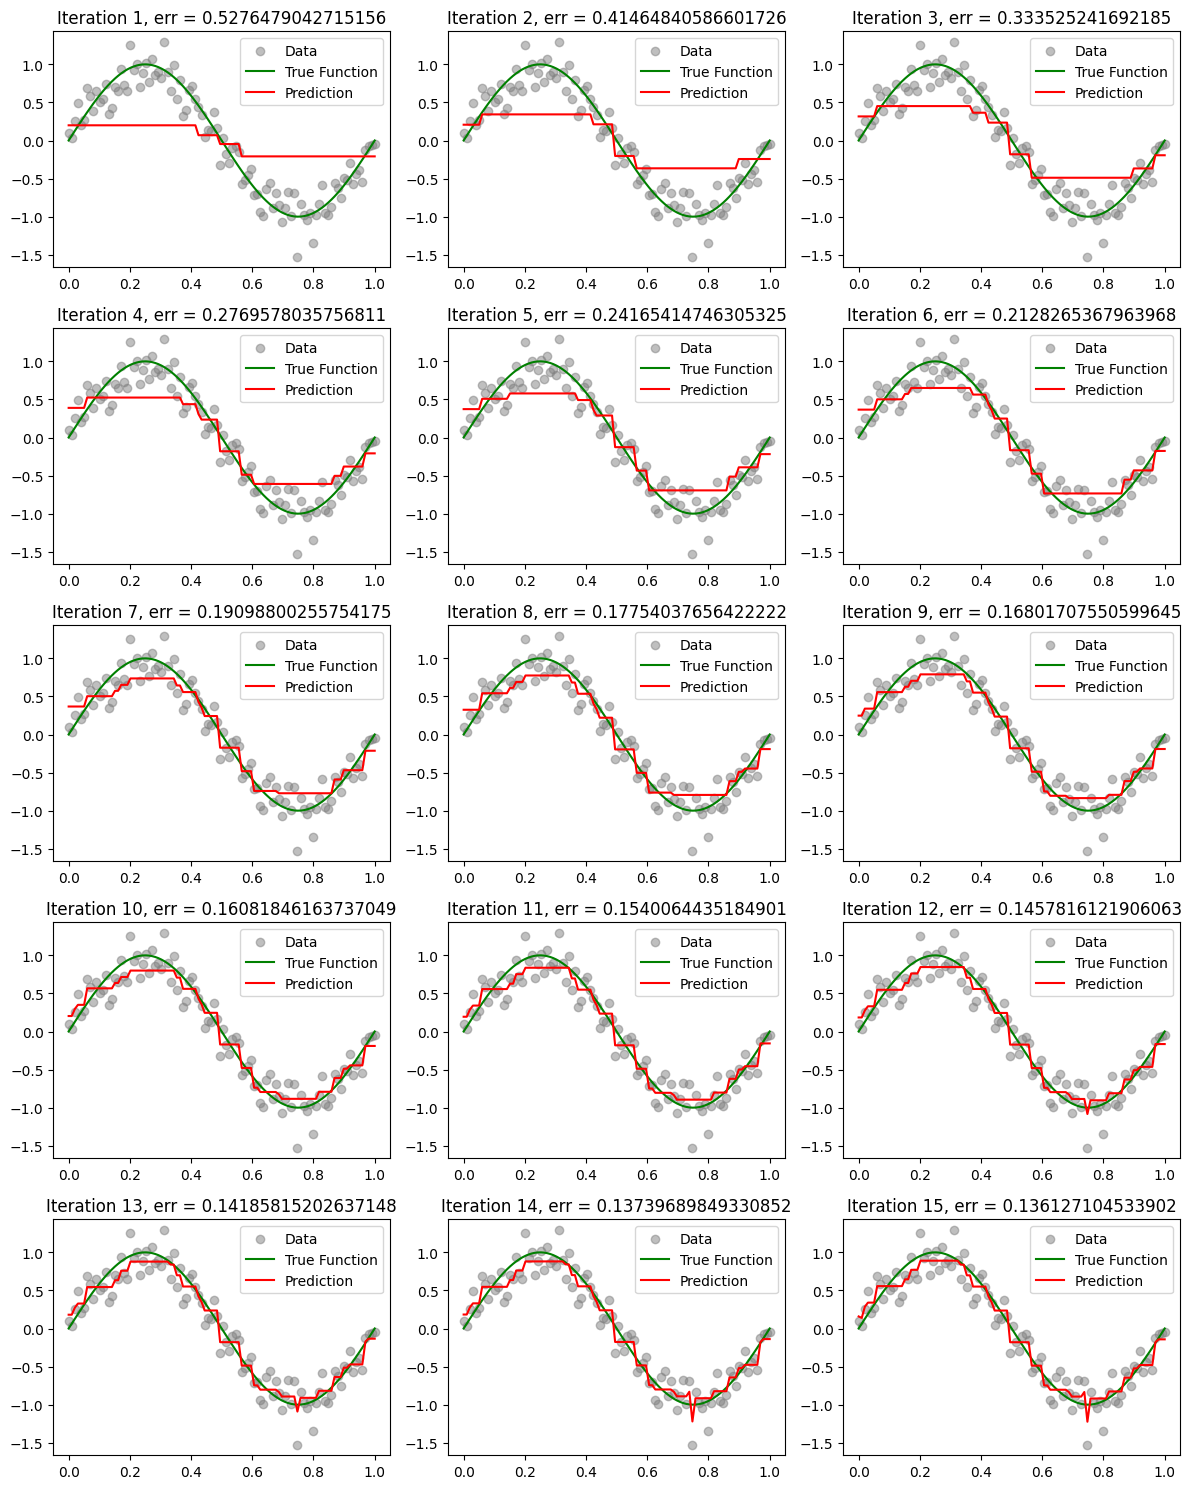

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * X)
y = y_true + np.random.normal(0, 0.2, size=X.shape)

# Initialize predictions
y_pred = np.zeros_like(y)
residuals = y.copy()

plt.figure(figsize=(12, 15))

# Visualize iterative boosting
for i in range(15):
    # Fit tree on residuals
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X.reshape(-1,1), residuals)

    # Update predictions
    pred_update = tree.predict(X.reshape(-1,1))
    y_pred += 0.3 * pred_update  # Learning rate = 0.3

    # Update residuals
    residuals = y - y_pred
    rmse = root_mean_squared_error(y, y_pred)

    # Plot current predictions
    plt.subplot(5, 3, i+1)
    plt.scatter(X, y, label='Data', color='gray', alpha=0.5)
    plt.plot(X, y_true, label='True Function', color='green')
    plt.plot(X, y_pred, label='Prediction', color='red')
    plt.title(f'Iteration {i+1}, err = {rmse}')
    plt.legend()


plt.tight_layout()
plt.show()


# 🔍 Understanding Learning Rate in Gradient Boosting

The **learning rate** (also called `eta`) is a hyperparameter that controls **how much each new tree contributes** to the overall prediction in a gradient boosting model.

Each iteration updates the prediction as:

\[
F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x)
\]

- `F_t(x)`: Prediction after t trees
- `h_t(x)`: Output from the t-th tree (correcting residuals)
- `η`: Learning rate (usually between 0.01 and 0.3)

Using a **smaller learning rate** slows down learning and reduces the risk of overfitting, but **requires more trees**. Larger values speed things up but may overshoot and overfit.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score -0.035150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

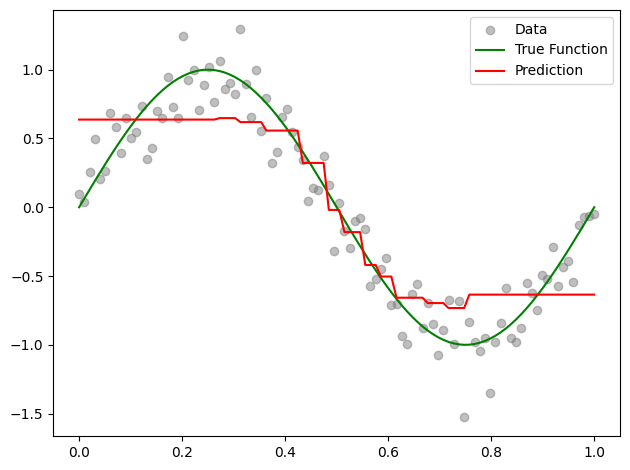

In [ ]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 100).reshape(-1, 1)  # Fix: reshape to 2D
y_true = np.sin(2 * np.pi * X).ravel()     # Ensure y is 1D
y = y_true + np.random.normal(0, 0.2, size=X.shape[0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
#XBG
#model = xgb.XGBRegressor(n_estimators=15, max_depth=3, learning_rate=0.1)

#LBG
model = lgb.LGBMRegressor(n_estimators=10, max_depth=6, learning_rate=0.3)

model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X)
rmse = root_mean_squared_error(y, y_pred)
print(f"RMSE: {rmse:.3f}")

plt.subplot()
plt.scatter(X, y, label='Data', color='gray', alpha=0.5)
plt.plot(X, y_true, label='True Function', color='green')
plt.plot(X, y_pred, label='Prediction', color='red')
plt.legend()


plt.tight_layout()
plt.show()


## Visualization: Feature importance
#xgb.plot_importance(model, importance_type='gain')
#plt.title('XGBoost Feature Importance')
#plt.show()


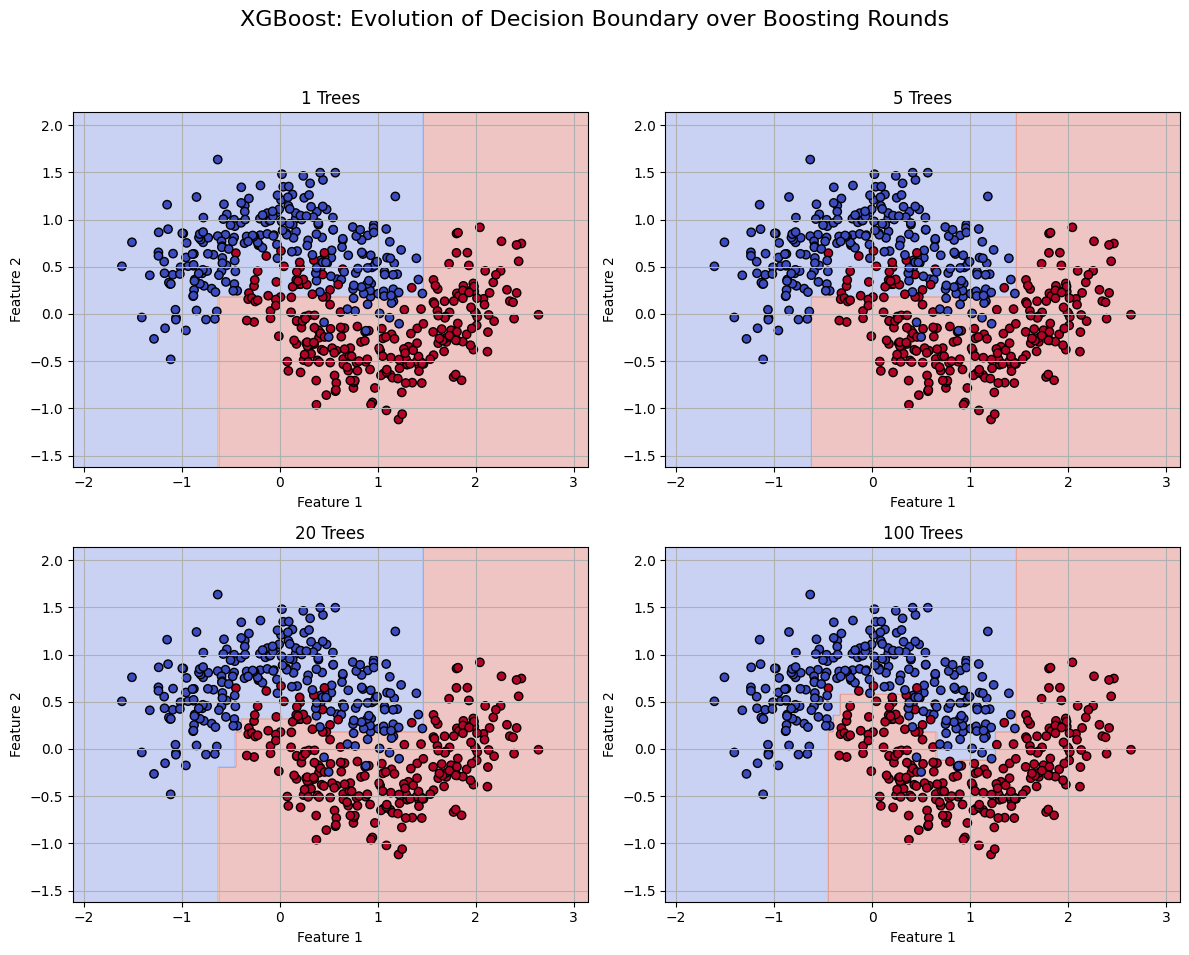

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train, y_train)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Convert mesh to DMatrix for Booster prediction
dmatrix = xgb.DMatrix(grid)

# Decision boundary plots over boosting iterations
tree_limits = [1, 5, 20, 100]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, limit in enumerate(tree_limits):
    # Get raw probability predictions
    preds = model.get_booster().predict(dmatrix, iteration_range=(0, limit))
    class_preds = (preds > 0.5).astype(int).reshape(xx.shape)

    axes[i].contourf(xx, yy, class_preds, alpha=0.3, cmap=plt.cm.coolwarm)
    axes[i].scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    axes[i].set_title(f"{limit} Trees")
    axes[i].set_xlabel("Feature 1")
    axes[i].set_ylabel("Feature 2")
    axes[i].grid(True)

plt.suptitle("XGBoost: Evolution of Decision Boundary over Boosting Rounds", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2025/Lec21/'
fname = filedir + "SW_with_AOD.csv"

import pandas as pd
BSRN = pd.read_csv(fname)

Mounted at /content/drive


In [ ]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = BSRN[["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]]
y = BSRN.SW_direct + BSRN.SW_diffuse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2176
[LightGBM] [Info] Number of data points in the train set: 28179, number of used features: 9
[LightGBM] [Info] Start training from score 628.425818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

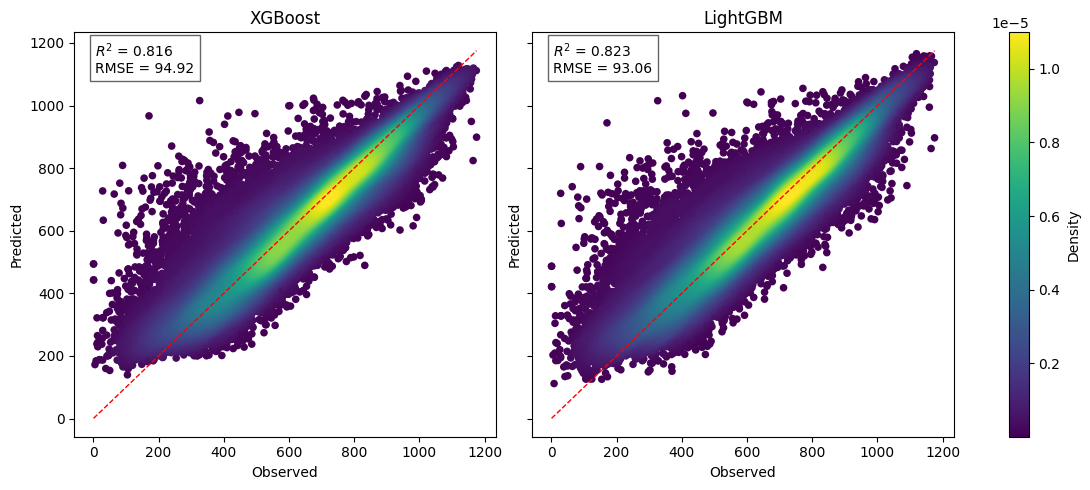

In [ ]:

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, root_mean_squared_error


# Train model

#XGB
xgb_model = xgb.XGBRegressor(n_estimators=50, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

#LGB
lgb_model = lgb.LGBMRegressor(n_estimators=50, max_depth=6, learning_rate=0.3)
lgb_model.fit(X_train, y_train)


# prediction
y_pred_xgb = xgb_model.predict(X)
y_pred_lgb = lgb_model.predict(X)

# Compute metrics
r2_xgb = r2_score(y, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y, y_pred_xgb))

r2_lgb = r2_score(y, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y, y_pred_lgb))

# Set up plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# KDE for density coloring
def density_scatter(ax, x, y, title, r2, rmse):
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    sc = ax.scatter(x, y, c=z, s=30, edgecolor='none', cmap='viridis')
    ax.plot([min(x), max(x)], [min(x), max(x)], 'r--', lw=1)
    ax.set_title(title)
    ax.set_xlabel("Observed")
    ax.set_ylabel("Predicted")
    ax.text(0.05, 0.9, f"$R^2$ = {r2:.3f}\nRMSE = {rmse:.2f}",
            transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
    return sc

# Plot and capture scatter for colorbar
sc1 = density_scatter(axs[0], y, y_pred_xgb, "XGBoost", r2_xgb, rmse_xgb)
sc2 = density_scatter(axs[1], y, y_pred_lgb, "LightGBM", r2_lgb, rmse_lgb)

fig.tight_layout()
cbar = fig.colorbar(sc1, ax=axs, label='Density')
plt.show()



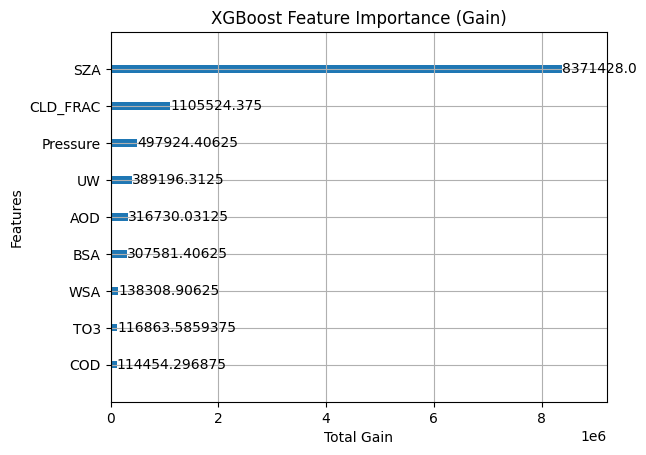

In [ ]:
xgb.plot_importance(xgb_model, importance_type='gain', title='XGBoost Feature Importance (Gain)', xlabel='Total Gain')
plt.show()

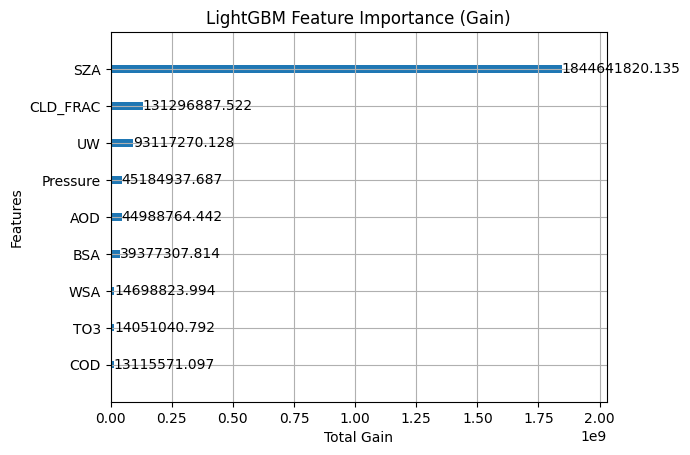

In [ ]:
lgb.plot_importance(lgb_model, importance_type='gain', title='LightGBM Feature Importance (Gain)', xlabel='Total Gain')
plt.show()